In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import cv2
# Replace 'path/to/dataset' with the actual path to your dataset folder
dataset_path = '/content/gdrive/MyDrive/DL&SIP/ILLUMINATION'

# Get a list of all the folder names in the dataset directory
class_names = os.listdir(dataset_path)

In [3]:
print(class_names)

['corkscrew', 'bowl', 'bottle', 'cup', 'cottonswab', 'cushion', 'knife']


In [4]:
img_list=[]
label_list=[]
target_size = (170, 170)

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img=cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img_list.append(img)
        label_list.append(class_name)

In [5]:
dataset_path1 = '/content/gdrive/MyDrive/DL&SIP/occlusion'

# Get a list of all the folder names in the dataset directory
class_names1 = os.listdir(dataset_path1)

In [6]:
print(class_names1)

['cushion', 'bottle', 'knife', 'cottonswab', 'cup', 'corkscrew', 'bowl']


In [7]:
for class_name in class_names1:
    class_path = os.path.join(dataset_path1, class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img=cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img_list.append(img)
        label_list.append(class_name)

In [8]:
dataset_path2 = '/content/gdrive/MyDrive/DL&SIP/Test'

# Get a list of all the folder names in the dataset directory
class_names2 = os.listdir(dataset_path2)

In [9]:
print(class_names2)

['corkscrew', 'cushion', 'bottle', 'knife', 'cottonswab', 'cup', 'bowl']


In [10]:
for class_name in class_names2:
    class_path = os.path.join(dataset_path2, class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img=cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img_list.append(img)
        label_list.append(class_name)

In [11]:
import numpy as np
img_array = np.array(img_list)

In [12]:
def Normalize_Images(images):
 # convert from integers to floats
 img_norm = images.astype('float32')
 # normalize to range 0-1
 img_norm = img_norm / 255.0
 # return normalized images
 return img_norm

In [13]:
 img_norm=Normalize_Images(img_array)
 img_norm

array([[[[0.4862745 , 0.5137255 , 0.42745098],
         [0.6156863 , 0.6431373 , 0.53333336],
         [0.62352943, 0.6431373 , 0.5254902 ],
         ...,
         [0.30588236, 0.3647059 , 0.25882354],
         [0.2627451 , 0.33333334, 0.23137255],
         [0.27058825, 0.34117648, 0.2509804 ]],

        [[0.62352943, 0.6509804 , 0.54509807],
         [0.6156863 , 0.6431373 , 0.53333336],
         [0.6156863 , 0.6392157 , 0.5176471 ],
         ...,
         [0.3372549 , 0.39607844, 0.2784314 ],
         [0.30588236, 0.36862746, 0.25882354],
         [0.28627452, 0.3529412 , 0.2509804 ]],

        [[0.627451  , 0.654902  , 0.54901963],
         [0.62352943, 0.6509804 , 0.5411765 ],
         [0.6313726 , 0.654902  , 0.53333336],
         ...,
         [0.45882353, 0.5176471 , 0.39215687],
         [0.3882353 , 0.44705883, 0.3254902 ],
         [0.32941177, 0.39215687, 0.28235295]],

        ...,

        [[0.22352941, 0.49411765, 0.62352943],
         [0.21960784, 0.49019608, 0.61960787]

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_array = le.fit_transform(label_list)

In [15]:
from keras.utils import to_categorical
label_array_cat = to_categorical(label_array)
label_array_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
label_array_cat.shape

(5805, 7)

In [17]:
img_norm.shape

(5805, 170, 170, 3)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(170, 170, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))
    model.add(Dense(7, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = cnn_model()


In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(img_norm, label_array_cat, test_size=0.3, shuffle=True)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)


In [20]:
 early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
 history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),callbacks=[early_stop], verbose=0)

Epoch 23: early stopping


In [21]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 95.408


In [22]:
from tensorflow.keras.models import save_model

# Assuming your trained model is stored in the variable 'model'
model.save("/content/gdrive/MyDrive/DL&SIP/model.h5")


In [23]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model on the test set and store the metrics
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), y_pred)

# Print the metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(report)

55/55 [==============================] - 1s 18ms/step
Test Accuracy: 0.9541
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       268
           1       0.95      0.89      0.92       292
           2       0.97      0.97      0.97       146
           3       0.98      0.96      0.97       193
           4       0.95      0.94      0.95       412
           5       0.95      1.00      0.97       220
           6       0.96      0.98      0.97       211

    accuracy                           0.95      1742
   macro avg       0.96      0.96      0.96      1742
weighted avg       0.95      0.95      0.95      1742



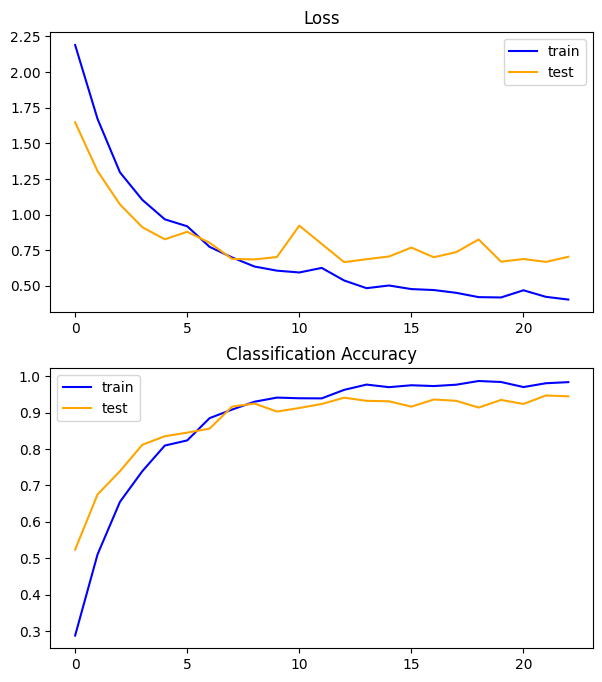

In [24]:
from matplotlib import pyplot as plt

def summarize_diagnostics(history):
    plt.figure(figsize=(7, 8)) # Set the figure size
    plt.subplot(2, 1, 1) # Create the first subplot for the loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()

    plt.subplot(2, 1, 2) # Create the second subplot for accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()

    plt.show()

summarize_diagnostics(history)


1/1 [==============================] - 0s 156ms/step


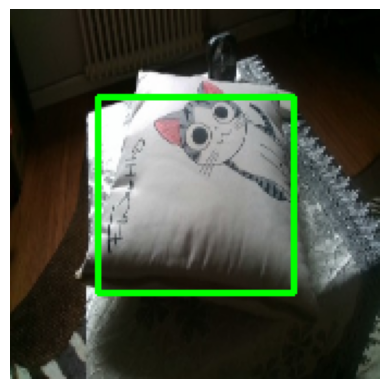

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image you want to predict
image_path ='/content/gdrive/MyDrive/DL&SIP/testing_data/cushion23_5.jpg'
input_image = cv2.imread(image_path)
input_image = cv2.resize(input_image, target_size)  # Resize the image to match the model input shape
input_image = np.expand_dims(input_image, axis=0)  # Add an extra dimension to match the batch size

# Normalize the input image
input_image = Normalize_Images(input_image)

# Perform the prediction
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = le.inverse_transform([predicted_class_index])[0]

# Add boundary box around the image
image_height, image_width = input_image.shape[1], input_image.shape[2]
box_color = (0, 255, 0)  # Green color for the boundary box
box_thickness = 2  # Thickness of the boundary box

# Calculate the coordinates for the boundary box
top_left = (40, 40)
bottom_right = (image_width - 40, image_height - 40)

# Draw the boundary box on the image
input_image_with_box = cv2.rectangle(input_image[0], top_left, bottom_right, box_color, box_thickness)

# Convert the image to RGB format for display
input_image_with_box_rgb = cv2.cvtColor(input_image_with_box, cv2.COLOR_BGR2RGB)

# Display the image with the boundary box
plt.imshow(input_image_with_box_rgb)
plt.axis('off')
plt.show()

print("Predicted class:", predicted_class)